In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from glob import glob
import seaborn as sns
import torch

/home/pedke/multi-task-learning/pedke-venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
a = torch.Tensor([1])
b = torch.Tensor([2])
torch.concat([a, b])

tensor([1., 2.])

In [2]:
def measure_prediction_similarity(pred_df, label_df, epoch, image_ids):    
    score_dict = {'matched': 0, 'closeby': 0, 'too_far': 0}
    total = 0

    exact, closeby, too_far_imgs = [], [], []

    for img in image_ids:
        img_pred = pred_df[pred_df.epoch==epoch][img]
        img_gt = label_df[label_df.epoch==epoch][img]

        diff = abs(img_pred.round().item() - img_gt.item())

        if diff == 0:
            score_dict['matched']+=1
            exact.append((img, img_pred.item(), img_pred.round().item()))
        elif diff == 1:
            score_dict['closeby']+=1
            closeby.append((img, img_pred.item(), img_pred.round().item()))
        else:
            score_dict['too_far']+=1
            too_far_imgs.append((img, img_pred.item(), img_pred.round().item()))
        
        total +=1
    
    print(f'\nExact: {exact}')
    print(f'Closeby: {closeby}')
    print(f'Too far: {too_far_imgs}')
    
    return score_dict, total


In [5]:
labels = pd.read_csv(r"/home/pedke/multi-task-learning/wandb/run-20230821_063938-pz1wmcbw/files/saved_preds/val_labels.csv")
preds = pd.read_csv(r"/home/pedke/multi-task-learning/wandb/run-20230821_063938-pz1wmcbw/files/saved_preds/val_preds.csv")

In [3]:
# image_ids = list(labels.keys())
# image_ids.remove('epoch')
def score_breakdown(dir_path):
    dir_path = dir_path

    anatomy = ['Shaft'] #['Glans', 'Meatus', 'Shaft']
    modes = ['val']# ['train', 'val']

    for mode in modes:
        labels = pd.read_csv(fr"{dir_path}/files/saved_preds/{mode}_labels.csv")
        preds = pd.read_csv(fr"{dir_path}/files/saved_preds/{mode}_preds.csv")

        for bodypart in anatomy:
            if mode == 'train':
                image_ids = list(labels.filter(regex=bodypart).keys())
            elif mode == 'val':
                image_ids = list(labels.filter(regex=bodypart).filter(regex='val').keys())

            score_dict, total = measure_prediction_similarity(preds, labels, epoch=39, image_ids=image_ids)
            print(f'{mode}-{bodypart} Score dict: {score_dict}', f'\nTotal: {total}')
    

In [4]:
score_breakdown(dir_path=r"/home/pedke/multi-task-learning/wandb/run-20230909_164100-r1eio183")


Exact: [('val_DSC07564-Shaft', 1.105658769607544, 1.0), ('val_2018-05-09 11.41.39-Shaft', 1.2109657526016235, 1.0), ('val_Photo 2017-06-07, 08 23 21-Shaft', 1.2209519147872925, 1.0), ('val_DSC07609-Shaft', 3.2242214679718018, 3.0), ('val_DSC08485-Shaft', 1.2771975994110107, 1.0), ('val_Harris poor plate2-Shaft', 1.063553810119629, 1.0)]
Closeby: [('val_DSCF5986-Shaft', 1.2861965894699097, 1.0), ('val_Photo 2015-09-03, 8 25 57 AM-Shaft', 1.1261826753616333, 1.0), ('val_Photo 2017-06-05, 10 36 01-Shaft', 1.6548678874969482, 2.0), ('val_Photo 2017-01-26, 11 18 57 AM-Shaft', 1.0198280811309814, 1.0), ('val_2018-01-15 08.39.51-Shaft', 1.2173455953598022, 1.0)]
Too far: [('val_DSC00723-Shaft', 1.265605926513672, 1.0), ('val_DSC02086-Shaft', 5.291793823242188, 5.0), ('val_DSC00131-Shaft', 1.4145591259002686, 1.0), ('val_Penoscrotal with bad plate-Shaft', 0.6938559412956238, 1.0), ('val_DSC04054-Shaft', 1.4188294410705566, 1.0), ('val_DSC03990-Shaft', 1.300009846687317, 1.0), ('val_P1080221-S

Exact: ['val_Harris poor plate2-Shaft', 'val_Photo 2017-06-07, 08 23 21-Shaft', 'val_DSC08485-Shaft', 'val_Photo 2017-06-05, 10 36 01-Shaft', 'val_2018-05-09 11.41.39-Shaft', 'val_DSC07564-Shaft']

Closeby: ['val_DSC02086-Shaft', 'val_2018-01-15 08.39.51-Shaft', 'val_Photo 2015-09-03, 8 25 57 AM-Shaft', 'val_DSCF5986-Shaft', 'val_Photo 2017-01-26, 11 18 57 AM-Shaft']

Too far: ['val_DSC00723-Shaft', 'val_Penoscrotal with bad plate-Shaft', 'val_DSC04054-Shaft', 'val_P1080221-Shaft', 'val_DSC03990-Shaft', 'val_DSC07609-Shaft', 'val_DSC00131-Shaft']

In [43]:
score_breakdown(dir_path=r"C:\Users\Parinita Edke\OneDrive - SickKids\vanilla-singletask\run-20230713_151912-vqocoqpx")

train-Glans Score dict: {'matched': 56, 'closeby': 84, 'too_far': 15} 
Total: 155
train-Meatus Score dict: {'matched': 38, 'closeby': 100, 'too_far': 17} 
Total: 155
train-Shaft Score dict: {'matched': 25, 'closeby': 75, 'too_far': 55} 
Total: 155
val-Glans Score dict: {'matched': 7, 'closeby': 10, 'too_far': 1} 
Total: 18
val-Meatus Score dict: {'matched': 3, 'closeby': 5, 'too_far': 10} 
Total: 18
val-Shaft Score dict: {'matched': 2, 'closeby': 9, 'too_far': 7} 
Total: 18


In [32]:
dir_path = r"/home/pedke/multi-task-learning/wandb/run-20230909_164100-r1eio183"
labels_df = pd.read_csv(fr"{dir_path}/files/saved_preds/val_labels.csv")
preds_df = pd.read_csv(fr"{dir_path}/files/saved_preds/val_preds.csv")

wanted_labels_keys = list(labels_df.filter(regex='Glans').filter(regex='val').keys())
wanted_preds_keys = list(preds_df.filter(regex='Glans').filter(regex='val').keys())

temp = labels_df[wanted_labels_keys]
labels_df = pd.DataFrame(temp.iloc[-1]).rename(columns={39: 'Labels'})

temp = preds_df[wanted_preds_keys]
preds_df = pd.DataFrame(temp.iloc[-1]).rename(columns={39: 'Preds'})

In [41]:
concat_df = pd.concat([labels_df, preds_df], axis=1)
concat_df['Rounded preds'] = np.round(concat_df['Preds'])
concat_df['Ceiled']=concat_df['Rounded preds'].apply(lambda x: 3.0 if x > 3.0 else x)
concat_df['Diff'] = np.absolute(concat_df['Ceiled'] - concat_df['Labels'])
concat_df

,Labels,Preds,Rounded preds,Ceiled,Diff
val_DSCF5986-Glans,1,1.558595,2.0,2.0,1.0
"val_Photo 2015-09-03, 8 25 57 AM-Glans",1,1.471690,1.0,1.0,0.0
"val_Photo 2017-06-05, 10 36 01-Glans",1,1.641554,2.0,2.0,1.0
val_DSC00723-Glans,2,1.554367,2.0,2.0,0.0
val_DSC07564-Glans,1,1.566553,2.0,2.0,1.0
"val_Photo 2017-01-26, 11 18 57 AM-Glans",2,1.309174,1.0,1.0,1.0
val_2018-01-15 08.39.51-Glans,2,1.523628,2.0,2.0,0.0
val_DSC02086-Glans,3,8.764864,9.0,3.0,0.0
val_2018-05-09 11.41.39-Glans,3,1.474033,1.0,1.0,2.0
"val_Photo 2017-06-07, 08 23 21-Glans",1,1.438228,1.0,1.0,0.0


In [42]:
concat_df['Diff'].value_counts()

Diff
0.0    8
1.0    7
2.0    2
3.0    1
Name: count, dtype: int64

In [27]:
df['val_Photo 2017-06-05, 10 36 01-Shaft']

0     0.521190
1     1.606410
2     1.280313
3     1.375625
4     1.600958
5     0.723729
6     1.542109
7     1.348605
8     1.381404
9     1.486353
10    1.508448
11    1.367722
12    1.517183
13    1.549547
14    1.479133
15    1.477134
16    1.516306
17    1.503314
18    1.472150
19    1.530013
20    1.451856
21    1.450348
22    1.442101
23    1.429728
24    1.444884
25    1.414677
26    1.406778
27    1.434361
28    1.450226
29    1.446667
30    1.436882
31    1.425113
32    1.457376
33    1.497743
34    1.455534
35    1.438007
36    1.496425
37    1.443995
38    1.443752
39    1.419607
Name: val_Photo 2017-06-05, 10 36 01-Shaft, dtype: float64

In [29]:
df[df.epoch==39]['val_Photo 2017-06-05, 10 36 01-Shaft']

39    1.419607
Name: val_Photo 2017-06-05, 10 36 01-Shaft, dtype: float64

In [7]:
preds

,epoch,camara dic 10 de 2013 018-Glans,DSCF8221-Glans,camara dic 10 de 2013 018-Meatus,DSCF8221-Meatus,camara dic 10 de 2013 018-Shaft,DSCF8221-Shaft,DSC00193-Glans,Iphone marzo 1 de 2012 043-Glans,DSC00193-Meatus,...,"Photo 2015-05-21, 8 25 46 AM-Shaft",b10-Glans,"Photo 2016-08-16, 8 41 14 AM (1)-Glans",b10-Meatus,"Photo 2016-08-16, 8 41 14 AM (1)-Meatus",b10-Shaft,"Photo 2016-08-16, 8 41 14 AM (1)-Shaft","Photo 2018-04-17, 10 55 43-Glans","Photo 2018-04-17, 10 55 43-Meatus","Photo 2018-04-17, 10 55 43-Shaft"
0,0,-0.024144,-0.007736,0.132191,0.134367,-0.000377,-0.019214,1384.650513,1118.811768,1913.617798,...,0.446497,0.980959,0.915233,2.710141,1.276034,0.580597,0.193195,0.668690,1.351589,0.488857
1,1,0.578958,1.357310,1.070902,0.953706,0.158662,0.873751,1.415090,2.240914,0.334302,...,0.280846,0.637674,0.684458,0.537817,0.635134,0.313667,0.488512,1.086110,0.969914,0.060538
2,2,1.670406,2.061771,2.706995,1.290491,2.405020,0.078354,0.907539,2.096043,2.110065,...,0.842789,1.131950,1.130713,0.903460,1.449131,0.419590,0.194463,1.334409,0.912000,1.069846
3,3,1.760570,1.100330,2.015868,1.920296,1.469221,1.428750,1.432275,1.205112,2.297971,...,0.620760,1.240162,1.072856,1.100034,1.032510,1.234590,0.581215,1.003761,1.265456,0.602882
4,4,1.023558,2.327535,1.995255,2.092294,1.609234,1.138876,1.018345,1.599717,1.917318,...,0.876307,0.749742,1.524582,0.592830,1.366401,0.215567,1.568736,1.434534,0.701257,0.177323
5,5,1.365675,0.913951,1.177469,1.600711,0.720034,0.775125,0.848509,1.355518,1.548332,...,0.550439,1.443659,1.114037,1.388169,0.740824,0.964995,0.402232,1.032508,1.094052,1.050246
6,6,0.959912,1.533397,1.298023,2.535244,1.130769,1.648372,1.037503,1.527497,1.198131,...,0.434301,1.103013,1.228645,1.466490,1.079416,0.824585,0.857734,1.677544,0.912910,0.791966
7,7,1.232177,1.301671,1.831832,1.748246,1.366461,1.621538,1.876395,1.737186,2.483037,...,0.945416,1.346506,1.388696,1.131849,1.319593,0.809116,0.707498,1.491724,1.426620,0.723000
8,8,1.308073,1.079448,2.115482,1.641392,1.514070,1.958974,1.785854,1.331681,1.740801,...,1.013951,1.314347,1.263338,1.149645,1.220703,0.794771,1.059604,1.703460,0.997091,0.582449
9,9,1.588038,1.548755,1.276957,1.984305,0.822686,1.799899,1.393241,1.267217,1.948053,...,1.024842,1.946486,1.519737,1.192869,1.537644,0.844010,1.069329,1.191730,1.429481,1.025693


In [9]:
preds.iloc[25].transpose()

epoch                                     25.000000
camara dic 10 de 2013 018-Glans            1.681022
DSCF8221-Glans                             1.104174
camara dic 10 de 2013 018-Meatus           2.023951
DSCF8221-Meatus                            1.219828
                                            ...    
b10-Shaft                                  1.112572
Photo 2016-08-16, 8 41 14 AM (1)-Shaft     1.289937
Photo 2018-04-17, 10 55 43-Glans           1.256438
Photo 2018-04-17, 10 55 43-Meatus          1.146898
Photo 2018-04-17, 10 55 43-Shaft           0.875228
Name: 25, Length: 817, dtype: float64

In [51]:
mode = 'val'
epoch = 25
main_folder = "run-20231024_120012-uuend3r1"


folder_lst = [main_folder]
name_lst = ['MSE']

root_path = "/home/pedke/multi-task-learning/wandb"


labels = pd.read_csv(fr"{root_path}/{main_folder}/files/saved_preds/{mode}_labels.csv")
mini_labels = pd.DataFrame(labels.iloc[epoch].transpose()).rename(columns={epoch: "labels"})

result = mini_labels

for i, folder in enumerate(folder_lst):

    preds = pd.read_csv(fr"{root_path}/{folder}/files/saved_preds/{mode}_preds.csv")
    
    mini_preds = pd.DataFrame(preds.iloc[epoch].transpose()).rename(columns={epoch: 'preds'})
    result = pd.concat([result, mini_preds], axis=1)
result.drop(index=result.index[0], axis=0, inplace=True)
result

,labels,preds
train_2018-04-03 10.55.47-Glans,1,1.655973
train_2018-03-27 07.41.06-Glans,2,1.651452
train_2018-04-03 10.55.47-Meatus,2,1.793793
train_2018-03-27 07.41.06-Meatus,1,1.781259
train_2018-04-03 10.55.47-Shaft,3,1.338168
...,...,...
val_DSCN2450-Glans,2,2.362634
val_a13-Meatus,1,1.526035
val_DSCN2450-Meatus,1,2.556236
val_a13-Shaft,0,1.133056


(0.0, 4.0)

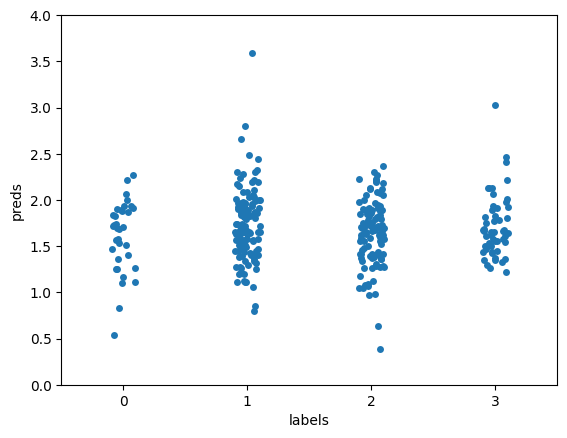

In [56]:
body_part = 'Glans'
body_df = result[[body_part in s for s in result.index]]
body_df
g = sns.stripplot(data=body_df, x='labels', y='preds')
g.set_ylim([0, 4])

In [53]:
body_df

,labels,preds
train_2018-04-03 10.55.47-Glans,1,1.655973
train_2018-03-27 07.41.06-Glans,2,1.651452
train_DSC01262-Glans,0,1.464966
train_P1010437-Glans,1,2.280906
train_DSCF3536-Glans,2,1.555763
...,...,...
"val_Photo 2013-09-05, 8 23 14 AM-Glans",1,2.030611
val_2018-03-27 08.59.00-Glans,2,2.052738
"val_Photo 2017-01-26, 11 19 30 AM-Glans",2,1.753644
val_a13-Glans,3,1.433358


<AxesSubplot:xlabel='labels', ylabel='SteeperMSE10_preds'>

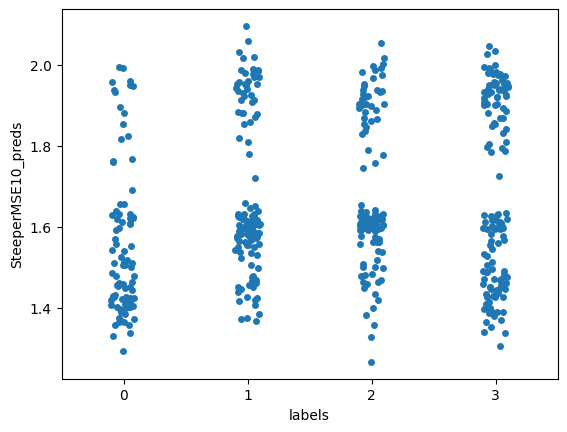

In [30]:
sns.stripplot(data=result, x='labels', y='SteeperMSE10_preds')

<AxesSubplot:xlabel='labels', ylabel='SteeperMSE25_preds'>

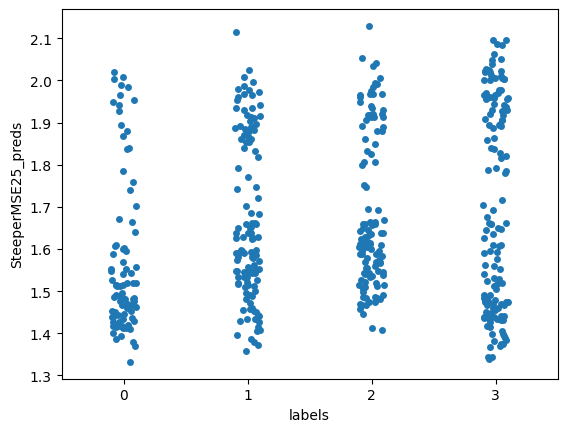

In [37]:
sns.stripplot(data=result, x='labels', y='SteeperMSE25_preds')

In [64]:
path = Path(r'C:\Users\Parinita Edke\Desktop\Hypospadias-Project\manual-baselines\model_preds')    
scores = {}

for dir in list(path.iterdir()):
    dir_name = dir.stem
    scores[dir_name] = []

    files = list(dir.glob("*val*"))
    # print(str(files[0]))
    # print(list(dir.iterdir().glob('*train*')))

    labels = pd.read_csv(fr"{str(files[0])}")
    preds = pd.read_csv(fr"{str(files[1])}")
    

    score_dict, total = measure_prediction_similarity(preds, labels, epoch=24)

    scores[dir_name].extend([score_dict, total])

    

In [65]:
scores

{'fancy-dawn-34': [{'matched': 33, 'closeby': 50, 'too_far': 16}, 99],
 'laced-sea-39': [{'matched': 33, 'closeby': 52, 'too_far': 14}, 99],
 'leafy-fire-35': [{'matched': 28, 'closeby': 36, 'too_far': 35}, 99],
 'northern-dew-38': [{'matched': 33, 'closeby': 52, 'too_far': 14}, 99],
 'stilted-jazz-36': [{'matched': 26, 'closeby': 35, 'too_far': 38}, 99],
 'worthy-microwave-40': [{'matched': 33, 'closeby': 53, 'too_far': 13}, 99]}

In [81]:
img_dir = Path(r"C:\Users\Parinita Edke\Desktop\Hypospadias-Project\Hypospadias-Data\datasets\19-April-23_split - no_special_chars\train\images")
len(list(img_dir.iterdir()))

155

In [6]:
10%5

0